In [51]:
import lda
import numpy as np
from numpy.random import default_rng
from scipy.special import digamma

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
from lda.utils import LDAGenerator

In [12]:
alpha = 0.1
eta = 0.1
n_components = 10
n_features = 100

In [13]:
gen = LDAGenerator(n_components=n_components, n_features=n_features, alpha=alpha, eta=eta)

# we can probably parallelize document creation
X, y = gen.sample(10000)

### Inference

In [33]:
# initialize variational topics and document-topic distributions
topic_word_distr = default_rng().uniform(0, 1, size=(n_components, n_features))
topic_word_distr /= topic_word_distr.sum(axis=1).reshape(-1, 1)
doc_topic_distr = np.ones((X.shape[0], n_components)) / n_components

In [40]:
from sklearn.decomposition import LatentDirichletAllocation

In [58]:
lda = LatentDirichletAllocation(verbose=True, n_jobs=8)

In [59]:
lda = lda.fit(X)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [60]:
y_hat = lda.transform(X)

<AxesSubplot:>

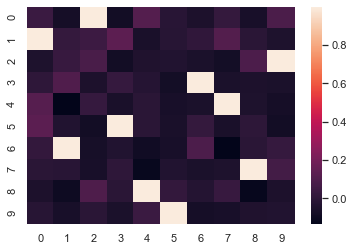

In [65]:
plt.figure()
sns.heatmap(np.corrcoef(lda.components_, gen.components_)[:10, 10:])